## Datos Super Join

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
super_join = pd.read_csv("/home/matias2202/Documentos/argXed/super_join.csv")

### Información del dataset

In [3]:
super_join.sample(5)

,alumne_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,ponderador_lengua,ponderador_matematica,ponderador_ciencias_naturales,...,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet_escuela,subvencion,dependencia,name_provincia,departamento_name,tasa_con_nbi
770868,49868,nc,NaN,nc,basico,satisfactorio,por_debajo_del_basico,5.542662,-1.000000,5.645423,...,bajo_y_medio,2.111111,tercil_alto,f,f,No corresponde,provincial,Catamarca,sin información,-1.000000
1026225,836210,f,medio,basico,satisfactorio,NaN,NaN,1.768918,1.772361,-1.000000,...,alto,2.052632,tercil_alto,f,f,No corresponde,provincial,Corrientes,San Cosme,0.150696
1761224,41628,nc,NaN,avanzado,avanzado,avanzado,avanzado,15.489170,16.759766,19.154018,...,bajo_y_medio,-1.000000,NaN,f,NaN,No corresponde,provincial,Neuquén,sin información,-1.000000
1124435,18367,nc,NaN,por_debajo_del_basico,satisfactorio,satisfactorio,basico,8.926380,10.777778,9.448052,...,critico,1.428571,tercil_bajo,f,t,No corresponde,provincial,Formosa,sin información,-1.000000
1014807,6712,nc,NaN,por_debajo_del_basico,basico,basico,basico,9.967890,11.939561,10.274232,...,critico,1.000000,tercil_bajo,f,NaN,No corresponde,provincial,Corrientes,Goya,0.153221


### Valores nulos de las columnas

In [4]:
super_join.isnull().any()

alumne_id                          False
sexo                               False
indice_socioeconomico               True
nivel_desemp_matematica             True
nivel_desemp_lengua                 True
nivel_desemp_ciencias_sociales      True
nivel_desemp_ciencias_naturales     True
ponderador_lengua                   True
ponderador_matematica               True
ponderador_ciencias_naturales       True
ponderador_ciencias_sociales        True
tiene_notebook                     False
tiene_pc                           False
tiene_tablet                       False
tiene_celular                      False
tiene_smartphone                   False
tiene_consola                      False
tiene_smarttv                      False
tiene_cable                        False
tiene_internet_alumne              False
repeticion_primaria                False
repeticion_secundaria              False
year_id                            False
nivel                              False
ambito          

## Información general

In [5]:
super_join.describe()

,alumne_id,ponderador_lengua,ponderador_matematica,ponderador_ciencias_naturales,ponderador_ciencias_sociales,year_id,icse,indice_socioeconomico_medio,tasa_con_nbi
count,1.835710e+06,1.696377e+06,1.726680e+06,1.732310e+06,1.756376e+06,1.835710e+06,1.835710e+06,1.835710e+06,1.833033e+06
mean,9.178555e+05,1.031906e+00,1.004982e+00,8.996754e-01,9.123590e-01,2.015702e+03,-1.399308e-01,1.972262e+00,-1.205184e-01
std,5.299240e+05,4.482136e+00,4.633515e+00,4.440036e+00,4.367103e+00,1.431061e+00,6.297882e-01,4.775150e-01,4.373123e-01
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.013000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,4.589282e+05,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.016000e+03,-1.000000e+00,1.795918e+00,3.522853e-02
50%,9.178555e+05,1.119620e+00,1.098848e+00,1.078306e+00,1.085212e+00,2.016000e+03,1.870000e-01,1.988095e+00,6.561996e-02
75%,1.376783e+06,1.442554e+00,1.468137e+00,1.420758e+00,1.414500e+00,2.017000e+03,3.360000e-01,2.205128e+00,1.148758e-01
max,1.835710e+06,1.097849e+02,1.244528e+02,9.870000e+02,1.027756e+02,2.017000e+03,9.110000e-01,3.000000e+00,3.973103e-01


### Valores obtenidos segun la disciplina

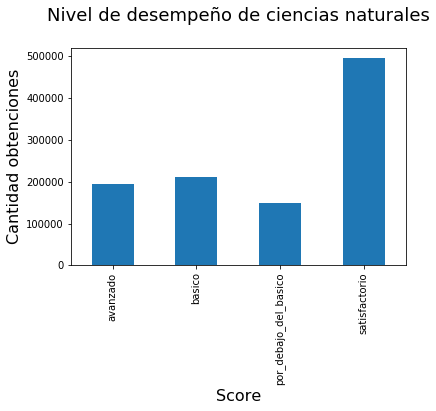

In [6]:

ORDER= ['avanzado','satisfactorio','basico','por_debajo_del_basico']
not_nc =  super_join.loc[super_join['nivel_desemp_ciencias_naturales']!= 'nc']
plot =not_nc['nivel_desemp_ciencias_naturales'].value_counts().sort_index().plot.bar()
plot.set_title('Nivel de desempeño de ciencias naturales\n',size=18)
plot.set_xlabel('Score',size=16)
plot.set_ylabel('Cantidad obtenciones',size=16)
plot

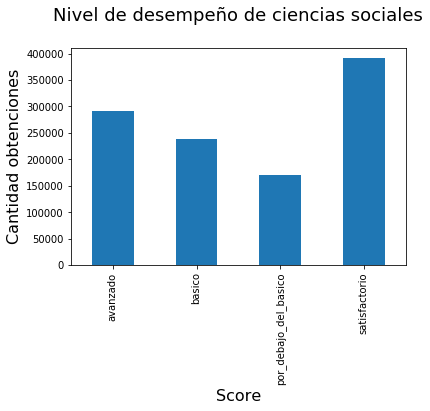

In [7]:
not_nc =  super_join.loc[super_join['nivel_desemp_ciencias_sociales']!= 'nc']
plot =not_nc['nivel_desemp_ciencias_sociales'].value_counts().sort_index().plot.bar()
plot.set_title('Nivel de desempeño de ciencias sociales\n',size=18)
plot.set_xlabel('Score',size=16)
plot.set_ylabel('Cantidad obtenciones',size=16)
plot

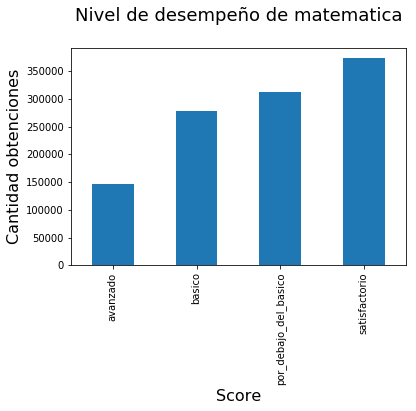

In [8]:
not_nc =  super_join.loc[super_join['nivel_desemp_matematica']!= 'nc']
plot =not_nc['nivel_desemp_matematica'].value_counts().sort_index().plot.bar()
plot.set_title('Nivel de desempeño de matematica\n',size=18)
plot.set_xlabel('Score',size=16)
plot.set_ylabel('Cantidad obtenciones',size=16)
plot

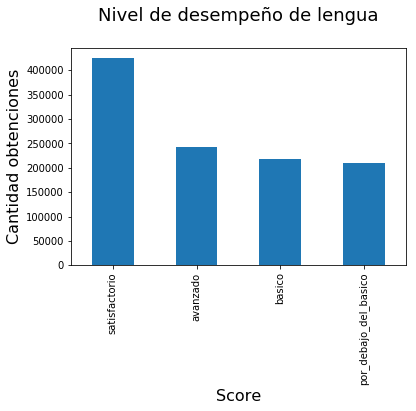

In [9]:
not_nc =  super_join.loc[super_join['nivel_desemp_lengua']!= 'nc']
plot =not_nc['nivel_desemp_lengua'].value_counts().plot.bar()
plot.set_title('Nivel de desempeño de lengua\n',size=18)
plot.set_xlabel('Score',size=16)
plot.set_ylabel('Cantidad obtenciones',size=16)
plot

# Analisis por variable del score
## Variable: Sexo

#### Definiciones

In [10]:
#Df's agrupados
not_nc = super_join.loc[super_join['sexo'] != 'nc']
sj_m = not_nc.loc[super_join['sexo'] == 'm']
sj_f = not_nc.loc[super_join['sexo'] == 'f']

#Constantes
ORDER= ['avanzado','satisfactorio','basico','por_debajo_del_basico']
SCORE_LANGUAGE = 'nivel_desemp_lengua'
SCORE_MATHS = 'nivel_desemp_matematica'
SCORE_SOCIAL = 'nivel_desemp_ciencias_sociales'
SCORE_NATURAL = 'nivel_desemp_ciencias_naturales'

In [11]:
#Porcentajes del dataset
super_join["sexo"].value_counts() / len(super_join["sexo"])

nc    0.448436
f     0.281268
m     0.270296
Name: sexo, dtype: float64

## Funcion que devuelve el dataframe con las distribuciones

In [12]:
ponderators = {
    SCORE_LANGUAGE: 'ponderador_lengua',
    SCORE_MATHS:'ponderador_matematica',
    SCORE_SOCIAL: 'ponderador_ciencias_sociales',
    SCORE_NATURAL: 'ponderador_ciencias_naturales' 
}
def normalized_dataframe(feature, scores):
    print("La normalización se llevo",sum(super_join[feature].notna()),"valores nulos en esta feature" )
    ponderator = ponderators[scores]
    sj = super_join[super_join[feature].notna()]
    sj = sj[sj[feature] != 'nc']
    aux = sj[(sj[ponderator].notnull()) &(sj[ponderator]!=-1.0) & (sj[scores].notnull())]
    aux = aux.groupby([feature,scores]).agg({ponderator:"sum"})
    for i in sj[feature].unique():
        aux.loc[i] = aux.loc[i].values / sum(aux.loc[i].get_values())[0]
    aux = aux.reset_index()
    return aux

### Desesmpeño en lengua

In [71]:
aux = normalized_dataframe(feature='sexo',scores=SCORE_LANGUAGE)

La normalización se llevo 1835710 valores nulos en esta feature


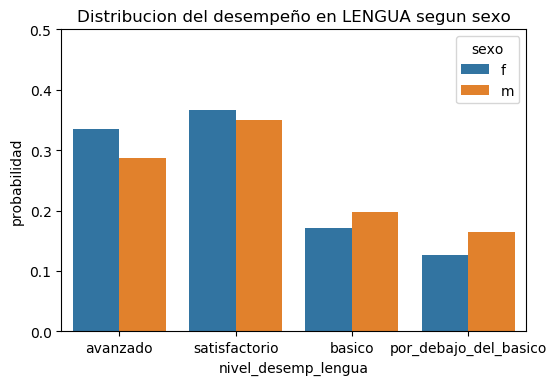

In [72]:
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en LENGUA segun sexo")
sns.barplot(x=SCORE_LANGUAGE,y=ponderators[SCORE_LANGUAGE],hue='sexo',data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_sexo_lengua.png")

# Desempeño en matematica

La normalización se llevo 1835710 valores nulos en esta feature


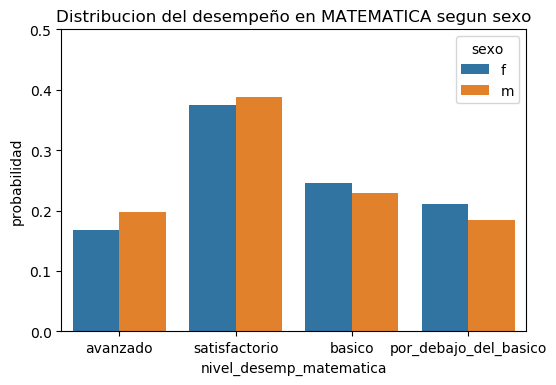

In [73]:
aux = normalized_dataframe(feature='sexo',scores=SCORE_MATHS)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en MATEMATICA segun sexo")
sns.barplot(x=SCORE_MATHS,y=ponderators[SCORE_MATHS],hue='sexo',data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_sexo_matematica.png")

# Desempeño en sociales

La normalización se llevo 1835710 valores nulos en esta feature


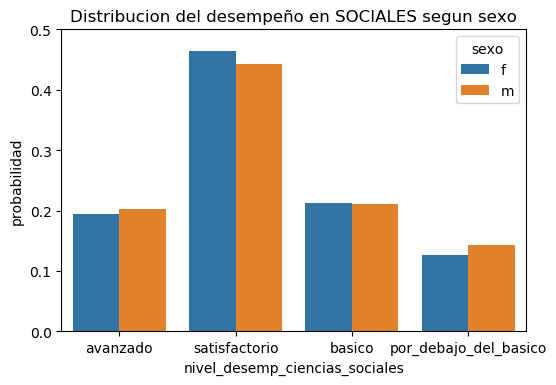

In [74]:
aux = normalized_dataframe(feature='sexo',scores=SCORE_SOCIAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en SOCIALES segun sexo")
sns.barplot(x=SCORE_SOCIAL,y=ponderators[SCORE_SOCIAL],hue='sexo',data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_sexo_sociales.png")

# Desempeño en naturales

La normalización se llevo 1835710 valores nulos en esta feature


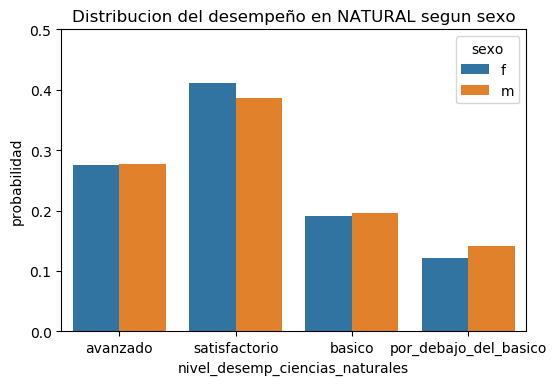

In [75]:
aux = normalized_dataframe(feature='sexo',scores=SCORE_NATURAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en NATURAL segun sexo")
sns.barplot(x=SCORE_NATURAL,y=ponderators[SCORE_NATURAL],hue='sexo',data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_sexo_naturales.png")

## Variable: indice_socioeconomico

In [18]:
SOCIAL_INDEX = 'indice_socioeconomico'
sj = super_join[super_join[SOCIAL_INDEX].notna()]
sj = sj[sj[SOCIAL_INDEX] != 'nc']


In [19]:
sum(super_join[SOCIAL_INDEX]=='nc')

227551

In [77]:
aux = normalized_dataframe(feature=SOCIAL_INDEX,scores=SCORE_MATHS)

La normalización se llevo 1463170 valores nulos en esta feature


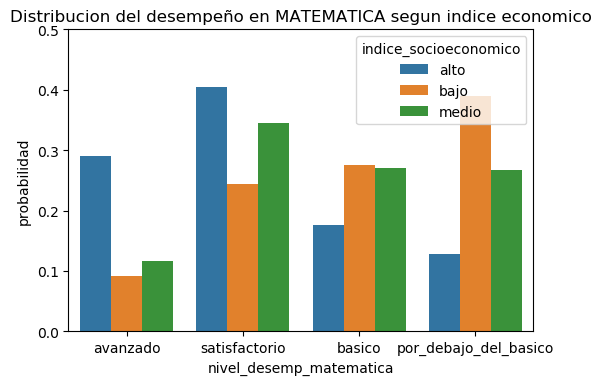

In [78]:
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en MATEMATICA segun indice economico")
sns.barplot(x=SCORE_MATHS,y=ponderators[SCORE_MATHS],hue=SOCIAL_INDEX,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_indice_socioeconomico_matematica.png")

In [22]:
sj[SOCIAL_INDEX].value_counts()

medio    805723
alto     228694
bajo     201202
Name: indice_socioeconomico, dtype: int64

La normalización se llevo 1463170 valores nulos en esta feature


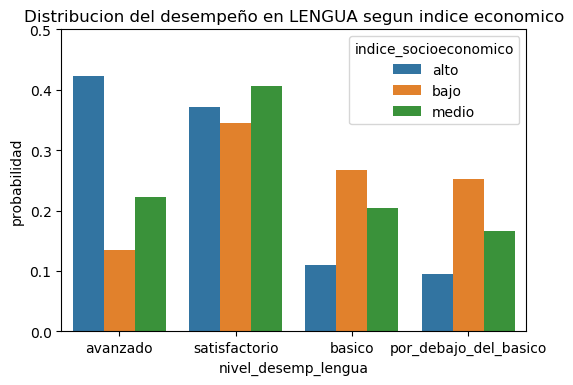

In [79]:
aux = normalized_dataframe(feature=SOCIAL_INDEX,scores=SCORE_LANGUAGE)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en LENGUA segun indice economico")
sns.barplot(x=SCORE_LANGUAGE,y=ponderators[SCORE_LANGUAGE],hue=SOCIAL_INDEX,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_indice_socioeconomico_lengua.png")

La normalización se llevo 1463170 valores nulos en esta feature


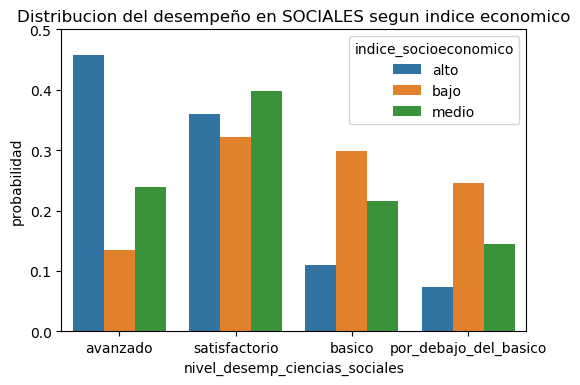

In [80]:
aux = normalized_dataframe(feature=SOCIAL_INDEX,scores=SCORE_SOCIAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en SOCIALES segun indice economico")
sns.barplot(x=SCORE_SOCIAL,y=ponderators[SCORE_SOCIAL],hue=SOCIAL_INDEX,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_indice_socioeconomico_sociales.png")

La normalización se llevo 1463170 valores nulos en esta feature


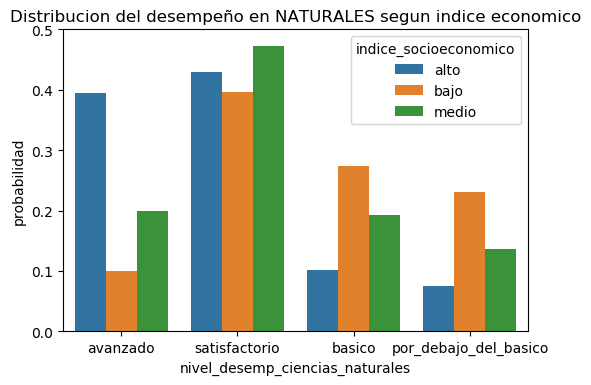

In [81]:
aux = normalized_dataframe(feature=SOCIAL_INDEX,scores=SCORE_NATURAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en NATURALES segun indice economico")
sns.barplot(x=SCORE_NATURAL,y=ponderators[SCORE_NATURAL],hue=SOCIAL_INDEX,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_indice_socioeconomico_naturales.png")

## Variable: Tiene notebook

In [26]:
TIENE_NOTEBOOK = 'tiene_notebook'

In [27]:
notebooks = sj[sj[TIENE_NOTEBOOK] != 'nc']
notebooks[TIENE_NOTEBOOK].value_counts() / len(super_join[TIENE_NOTEBOOK])

si    0.198196
no    0.162503
Name: tiene_notebook, dtype: float64

La normalización se llevo 1835710 valores nulos en esta feature


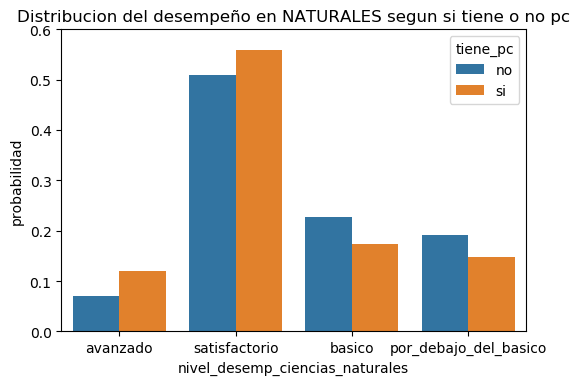

In [83]:
aux = normalized_dataframe(feature=TIENE_NOTEBOOK,scores=SCORE_NATURAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en NATURALES segun si tiene o no notebook")
sns.barplot(x=SCORE_NATURAL,y=ponderators[SCORE_NATURAL],hue=TIENE_NOTEBOOK,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.6])
plt.savefig("plots/distribucion_desempeño_tiene_notebook_naturales.png")

La normalización se llevo 1835710 valores nulos en esta feature


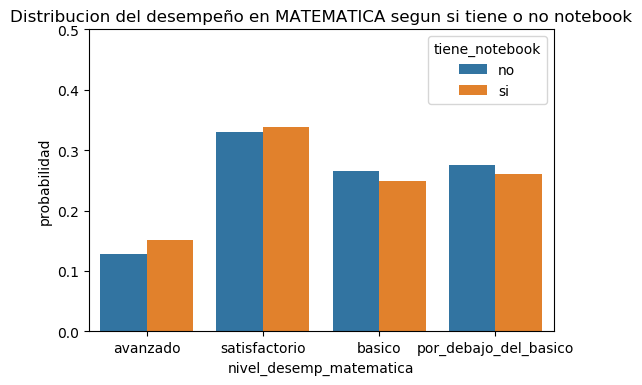

In [29]:
aux = normalized_dataframe(feature=TIENE_NOTEBOOK,scores=SCORE_MATHS)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en MATEMATICA segun si tiene o no notebook")
sns.barplot(x=SCORE_MATHS,y=ponderators[SCORE_MATHS],hue=TIENE_NOTEBOOK,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_tiene_notebook_matematica.png")

La normalización se llevo 1835710 valores nulos en esta feature


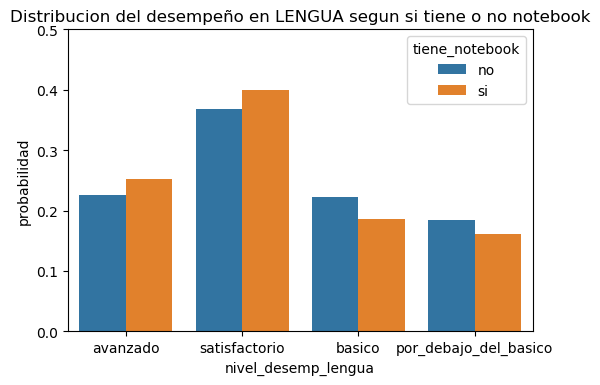

In [30]:
aux = normalized_dataframe(feature=TIENE_NOTEBOOK,scores=SCORE_LANGUAGE)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en LENGUA segun si tiene o no notebook")
sns.barplot(x=SCORE_LANGUAGE,y=ponderators[SCORE_LANGUAGE],hue=TIENE_NOTEBOOK,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_tiene_notebook_lengua.png")

La normalización se llevo 1835710 valores nulos en esta feature


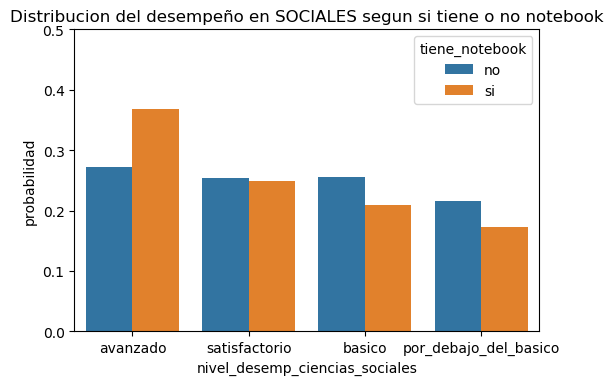

In [34]:
aux = normalized_dataframe(feature=TIENE_NOTEBOOK,scores=SCORE_SOCIAL)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en SOCIALES segun si tiene o no notebook")
sns.barplot(x=SCORE_SOCIAL,y=ponderators[SCORE_SOCIAL],hue=TIENE_NOTEBOOK,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_tiene_notebook_sociales.png")

## Variable: Tiene PC

In [35]:
TIENE_PC = 'tiene_pc'
notebooks = sj[sj[TIENE_PC] != 'nc']
notebooks[TIENE_PC].value_counts() / len(super_join[TIENE_PC])

si    0.196936
no    0.163763
Name: tiene_pc, dtype: float64

In [ ]:
aux = normalized_dataframe(feature=TIENE_PC,scores=SCORE_MATHS)
plt.figure(dpi=100)
plt.title("Distribucion del desempeño en MATEMATICA segun si tiene o no PC")
sns.barplot(x=SCORE_MATHS,y=ponderators[SCORE_MATHS],hue=TIENE_PC,data=aux, order= ORDER)
plt.ylabel("probabilidad")
plt.ylim([0,0.5])
plt.savefig("plots/distribucion_desempeño_tiene_pc_matematica.png")

# Selecciono features y guardo todos los graficos

In [50]:
features_interes = {
    "tiene_pc":"tiene o no pc",                        
    "tiene_tablet":"tiene o no tablet",                      
    "tiene_celular":"tiene o no celular",                    
    "tiene_smartphone":"tiene o no smartphone",
    "tiene_consola":"tiene o no consola",                   
    "tiene_smarttv":"tiene o no smarttv",
    "tiene_cable":"tiene o no cable",
    "tiene_internet_alumne": "tiene o no internet",
    "repeticion_primaria": "repitió o no la primaria",
    "repeticion_secundaria": "repitió o no la primaria",
    "ambito": "el ambito",                          
    "gestion": "el tipo de gestion",
    "icse_cat":"el icse_cat"
    }
materias = {SCORE_MATHS:"MATEMATICA",
            SCORE_LANGUAGE:"LENGUA",
            SCORE_SOCIAL:"SOCIALES",
            SCORE_NATURAL:"NATURALES"}

In [69]:
for feature in features_interes:
    print(feature)
    sj[sj[feature] != 'nc']
    print(super_join[feature].value_counts() / len(super_join[feature]))

tiene_pc
nc    0.589286
si    0.220024
no    0.190690
Name: tiene_pc, dtype: float64
tiene_tablet
nc    0.589286
no    0.237023
si    0.173691
Name: tiene_tablet, dtype: float64
tiene_celular
nc    0.589286
si    0.340014
no    0.070700
Name: tiene_celular, dtype: float64
tiene_smartphone
nc    0.589286
no    0.304939
si    0.105775
Name: tiene_smartphone, dtype: float64
tiene_consola
nc    0.589286
no    0.243509
si    0.167206
Name: tiene_consola, dtype: float64
tiene_smarttv
nc    0.589286
no    0.208624
si    0.202090
Name: tiene_smarttv, dtype: float64
tiene_cable
nc    0.589286
si    0.239675
no    0.171040
Name: tiene_cable, dtype: float64
tiene_internet_alumne
nc    0.589286
si    0.276765
no    0.133949
Name: tiene_internet_alumne, dtype: float64
repeticion_primaria
no                  0.524712
nc                  0.410224
una_vez             0.052100
dos_veces           0.009725
tres_veces_o_mas    0.003239
Name: repeticion_primaria, dtype: float64
repeticion_secundaria
nc   

In [68]:
sum(sj["gestion"].isnull())

0